### Individual Univariate Plots

Data loaded and cleaned. Rows: 621


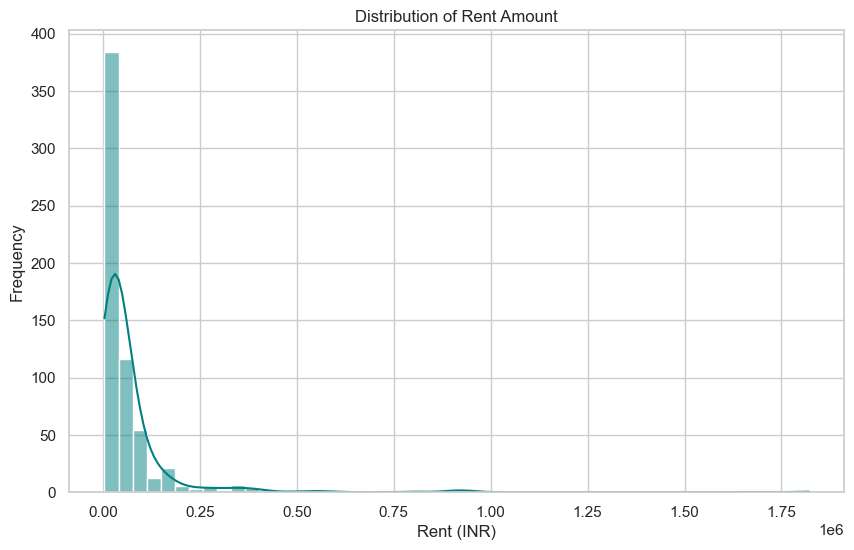

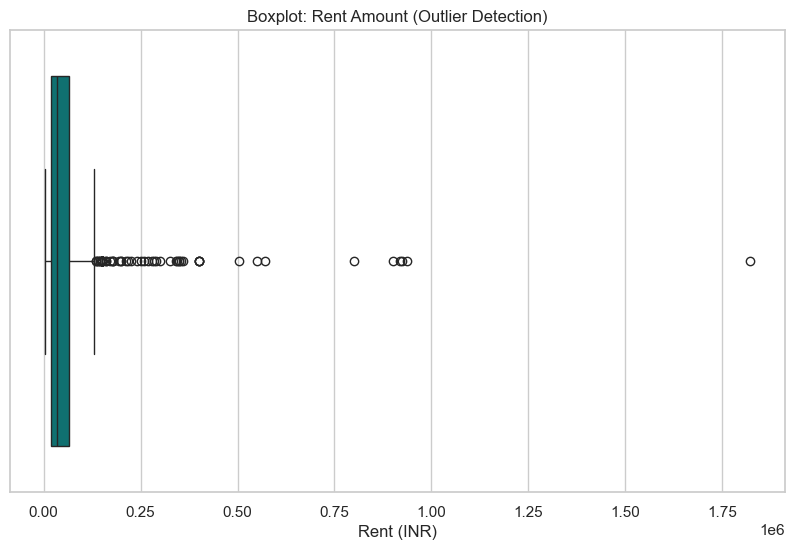

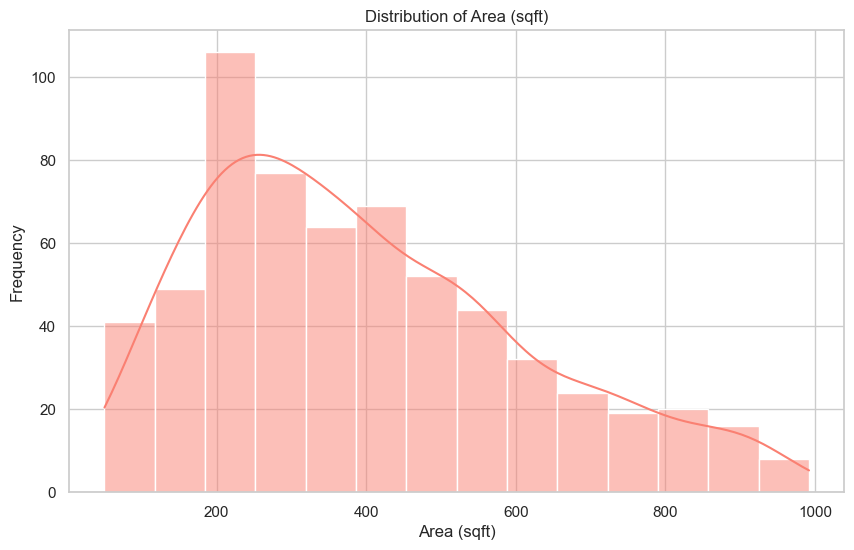

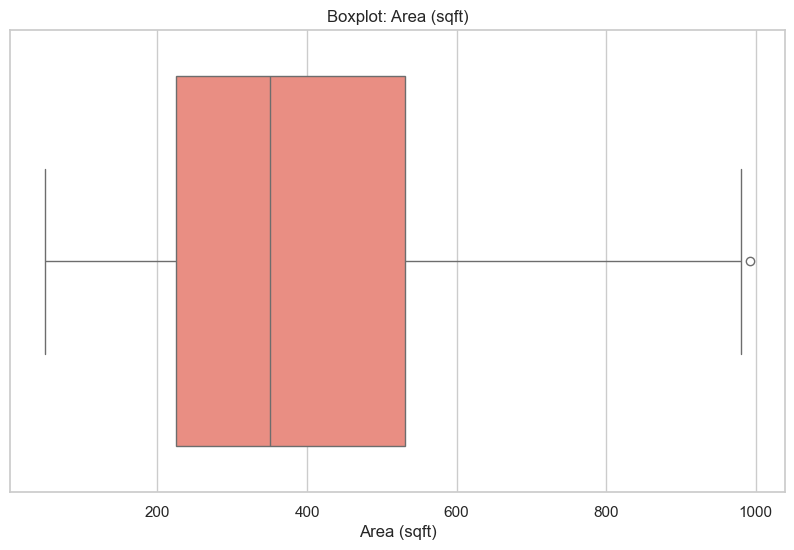

C:\Users\rohit\AppData\Local\Temp\ipykernel_13988\1033602082.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='locality', order=order_loc, palette='viridis')


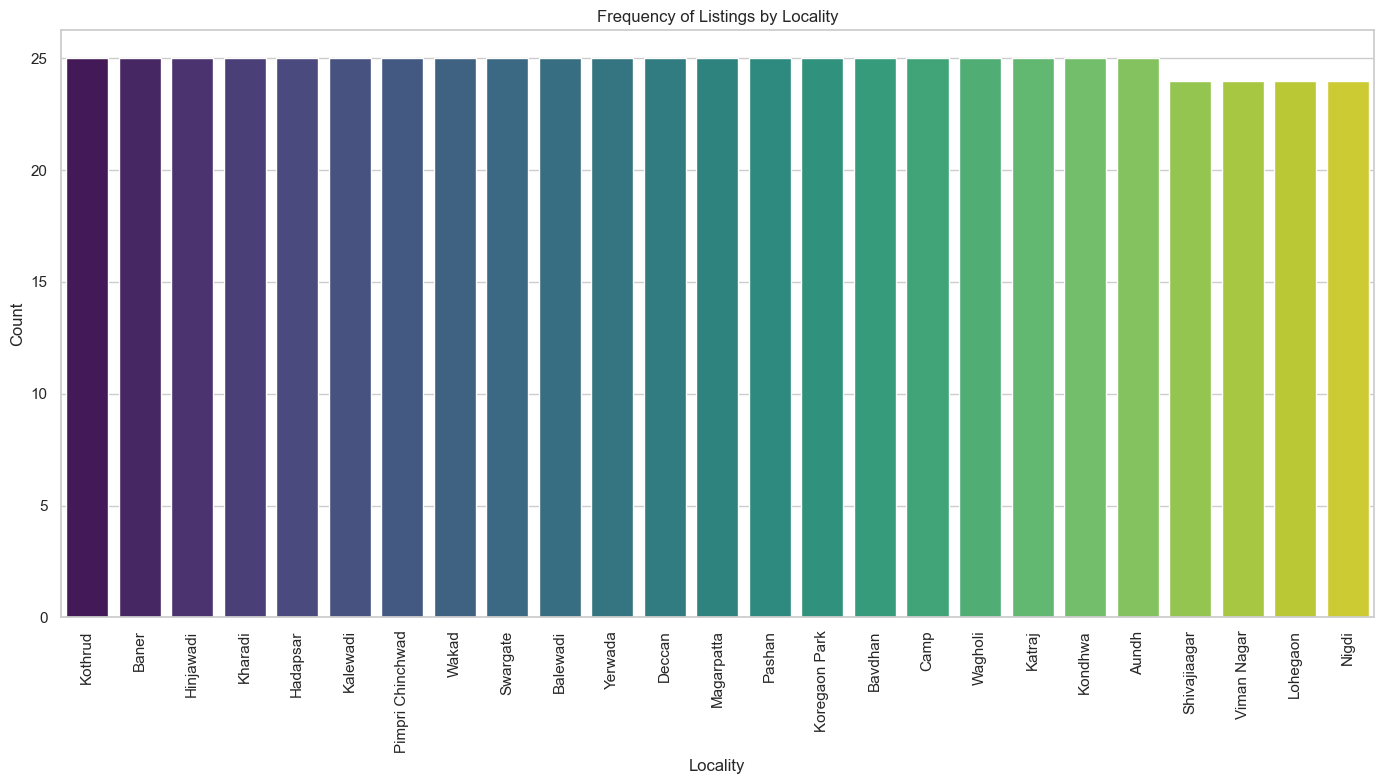

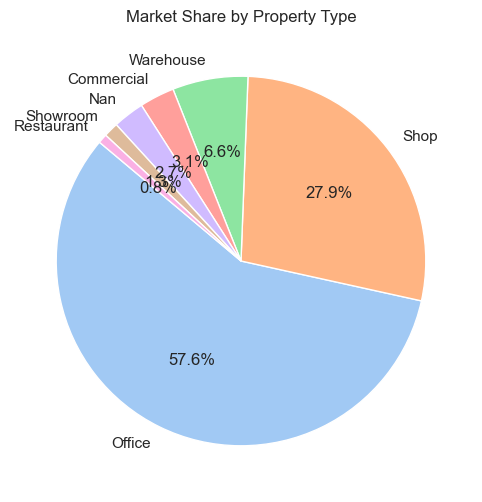

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# 1. Setup & Data Loading
# ---------------------------------------------------------
# Set style for professional plots
sns.set(style="whitegrid")
# Default figure size for individual plots
plt.rcParams["figure.figsize"] = (10, 6)

# Load Data
file_path = 'pune_commercial_listings_FINAL.csv'
df = pd.read_csv(file_path)

# Data Cleaning: Remove rows with area < 50 sqft (Errors)
df_clean = df[df['area_sqft'] >= 50].copy()
print(f"Data loaded and cleaned. Rows: {len(df_clean)}")

# ---------------------------------------------------------
# 2. Numerical Variable Visualization (Individual Plots)
# ---------------------------------------------------------
# We generate a separate figure for each plot using plt.figure()

# Plot 1: Rent Amount Distribution
plt.figure()
sns.histplot(df_clean['rent_amount'], kde=True, color='teal')
plt.title('Distribution of Rent Amount')
plt.xlabel('Rent (INR)')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Rent Amount Boxplot (Outliers)
plt.figure()
sns.boxplot(x=df_clean['rent_amount'], color='teal')
plt.title('Boxplot: Rent Amount (Outlier Detection)')
plt.xlabel('Rent (INR)')
plt.show()

# Plot 3: Area Distribution
plt.figure()
sns.histplot(df_clean['area_sqft'], kde=True, color='salmon')
plt.title('Distribution of Area (sqft)')
plt.xlabel('Area (sqft)')
plt.ylabel('Frequency')
plt.show()

# Plot 4: Area Boxplot
plt.figure()
sns.boxplot(x=df_clean['area_sqft'], color='salmon')
plt.title('Boxplot: Area (sqft)')
plt.xlabel('Area (sqft)')
plt.show()

# ---------------------------------------------------------
# 3. Categorical Variable Visualization (Individual Plots)
# ---------------------------------------------------------

# Plot 5: Count Plot for Locality
plt.figure(figsize=(14, 8))  # Increased size to fit all locality names
order_loc = df_clean['locality'].value_counts().index
sns.countplot(data=df_clean, x='locality', order=order_loc, palette='viridis')
plt.xticks(rotation=90)  # Rotate labels for readability
plt.title('Frequency of Listings by Locality')
plt.xlabel('Locality')
plt.ylabel('Count')
plt.tight_layout() # Ensures labels fit
plt.show()

# Plot 6: Pie Chart for Property Type
plt.figure()
prop_counts = df_clean['property_type'].value_counts()
plt.pie(prop_counts, labels=prop_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette('pastel'))
plt.title('Market Share by Property Type')
plt.show()

--------
--------

### Bi-variate Plots.

Data Loaded. Rows: 621


C:\Users\rohit\AppData\Local\Temp\ipykernel_13988\103297827.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_clean, x='property_type', y='rent_amount', palette='muted')


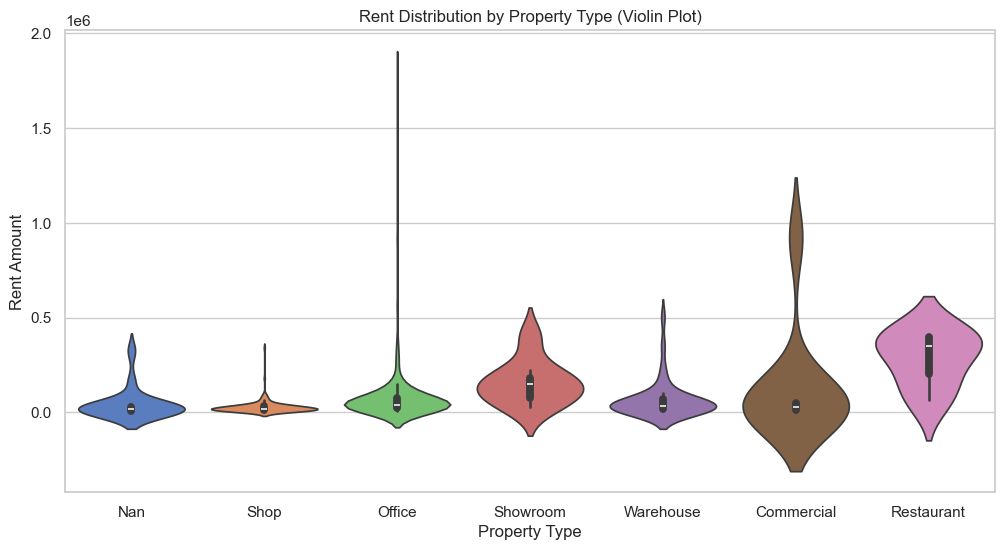

C:\Users\rohit\AppData\Local\Temp\ipykernel_13988\103297827.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locs.index, y=top_locs.values, palette='viridis')


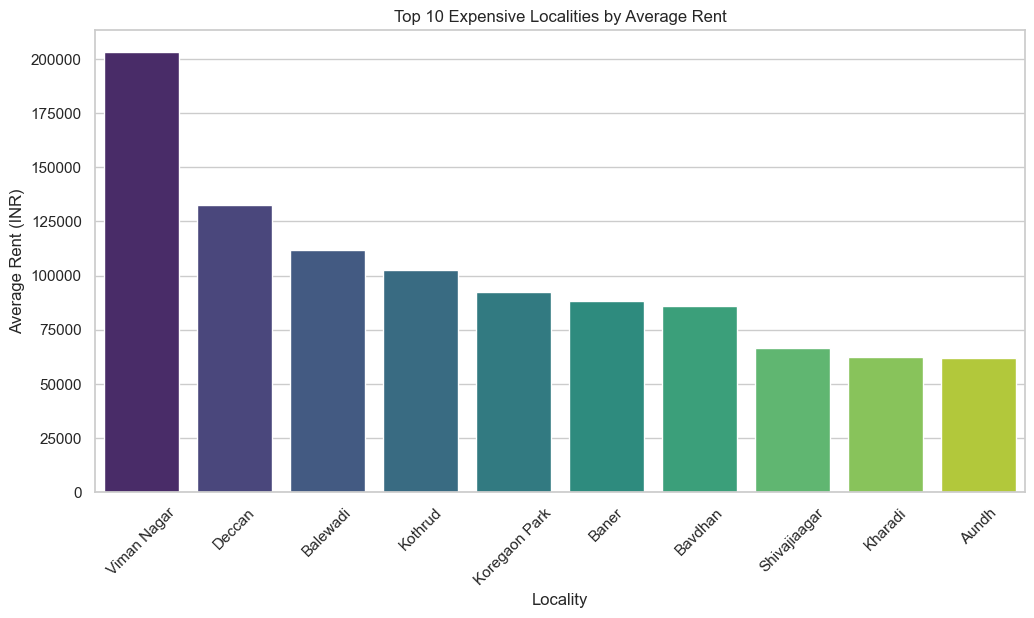

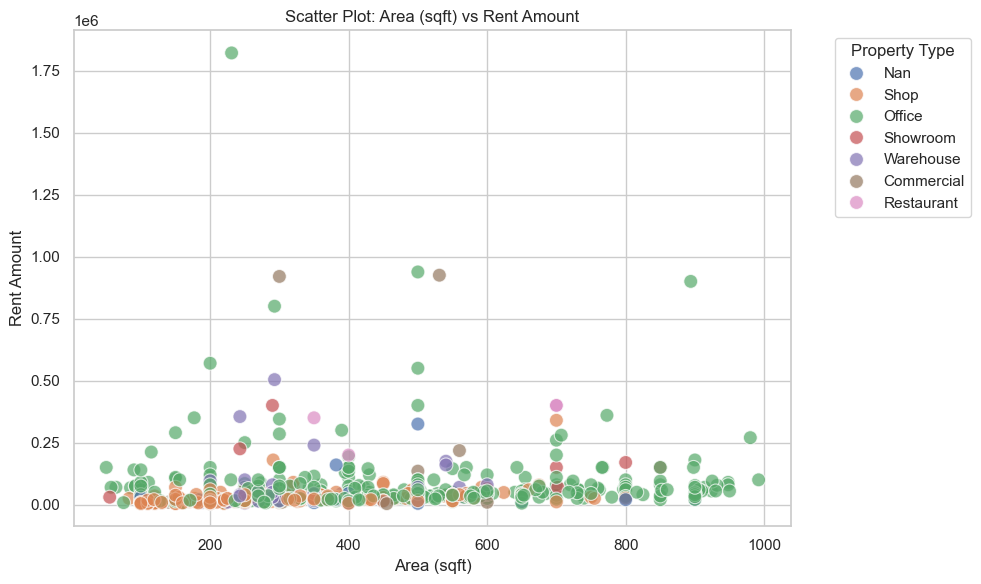

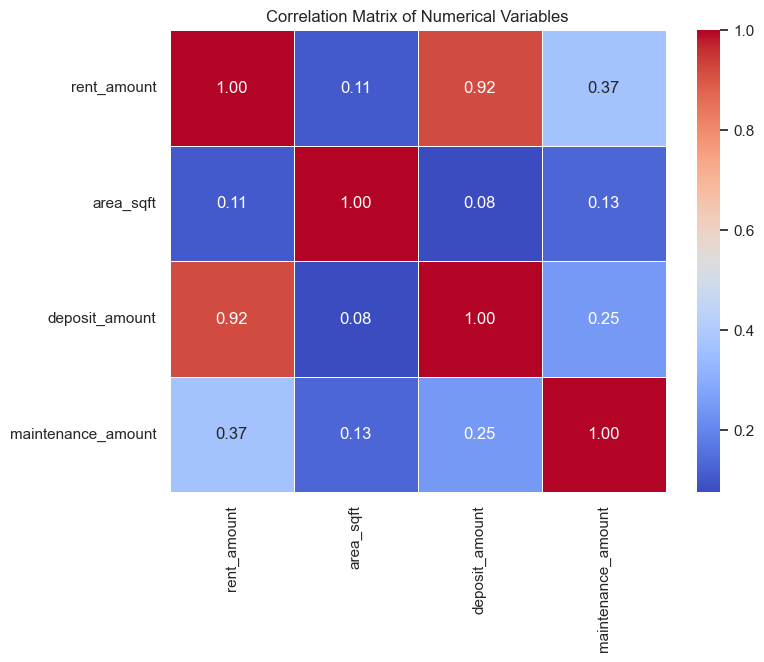

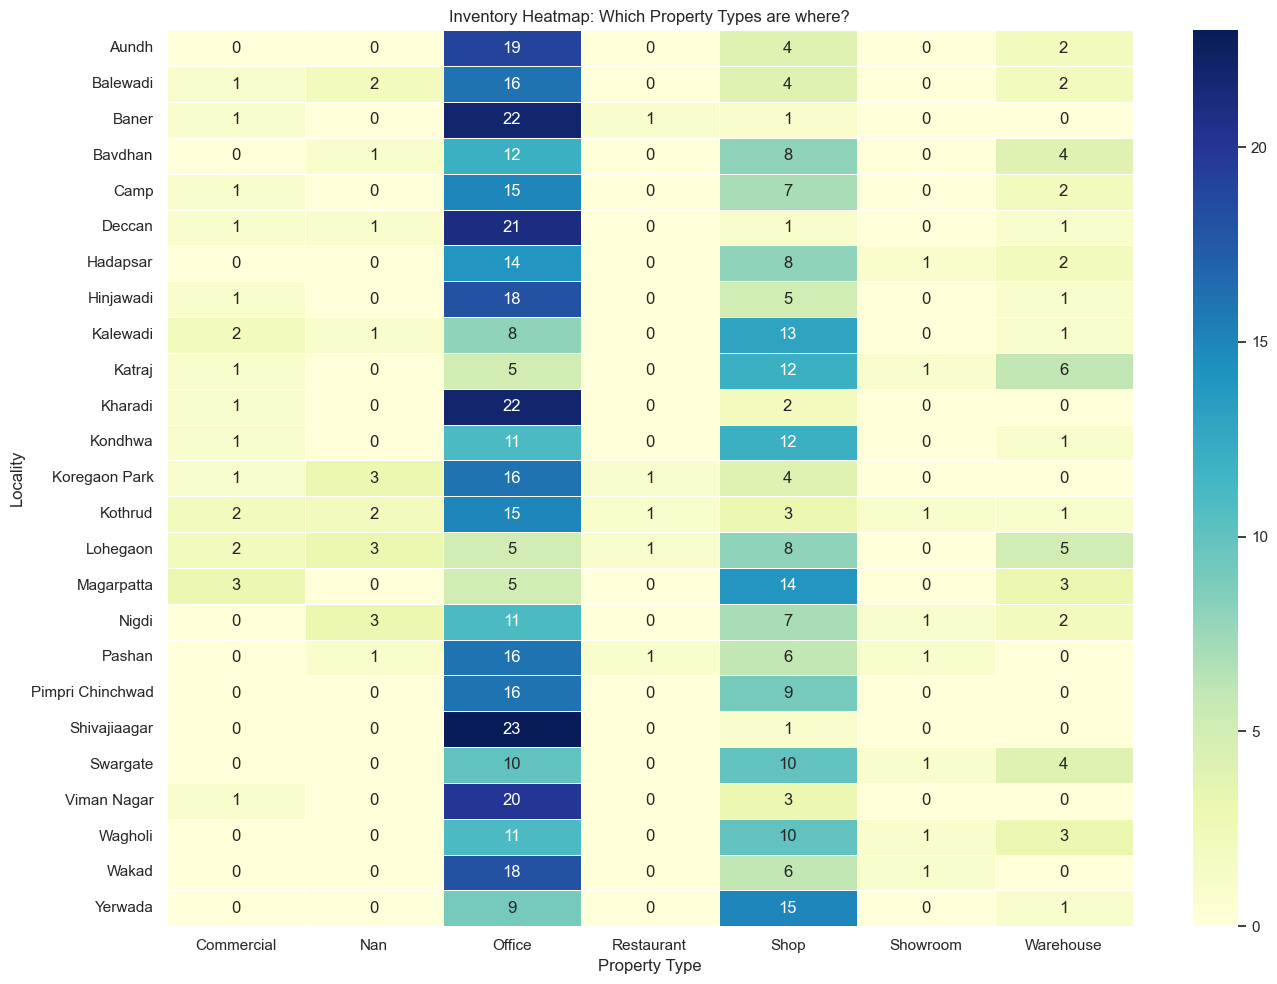

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# 1. Setup & Data Loading
# ---------------------------------------------------------
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load Data
file_path = 'pune_commercial_listings_FINAL.csv'
df = pd.read_csv(file_path)

# Data Cleaning
df_clean = df[df['area_sqft'] >= 50].copy()
print(f"Data Loaded. Rows: {len(df_clean)}")

# ---------------------------------------------------------
# 2. Continuous vs Categorical (Individual Plots)
# ---------------------------------------------------------

# Plot 1: Rent Distribution by Property Type (Violin Plot)
# Helps see the density and range of rent for each type
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_clean, x='property_type', y='rent_amount', palette='muted')
plt.title('Rent Distribution by Property Type (Violin Plot)')
plt.xlabel('Property Type')
plt.ylabel('Rent Amount')
plt.show()

# Plot 2: Top 10 Expensive Localities (Bar Plot)
# We calculate the mean rent per locality to find the most expensive areas
top_locs = df_clean.groupby('locality')['rent_amount'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_locs.index, y=top_locs.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Expensive Localities by Average Rent')
plt.xlabel('Locality')
plt.ylabel('Average Rent (INR)')
plt.show()

# ---------------------------------------------------------
# 3. Continuous vs Continuous (Individual Plots)
# ---------------------------------------------------------

# Plot 3: Area vs Rent (Scatter Plot)
# Shows the relationship between size and price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='area_sqft', y='rent_amount', hue='property_type', alpha=0.7, s=100)
plt.title('Scatter Plot: Area (sqft) vs Rent Amount')
plt.xlabel('Area (sqft)')
plt.ylabel('Rent Amount')
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot 4: Correlation Matrix (Heatmap)
# Checks numerical correlations
plt.figure(figsize=(8, 6))
corr_matrix = df_clean[['rent_amount', 'area_sqft', 'deposit_amount', 'maintenance_amount']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# ---------------------------------------------------------
# 4. Categorical vs Categorical (Individual Plots)
# ---------------------------------------------------------

# Plot 5: Locality vs Property Type (Crosstab Heatmap)
# Shows inventory distribution
ct = pd.crosstab(df_clean['locality'], df_clean['property_type'])

plt.figure(figsize=(14, 10)) # Larger size for readability
sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title('Inventory Heatmap: Which Property Types are where?')
plt.xlabel('Property Type')
plt.ylabel('Locality')
plt.tight_layout()
plt.show()

----------
--------

### Multivariate analysis.

Data Loaded. Rows: 621


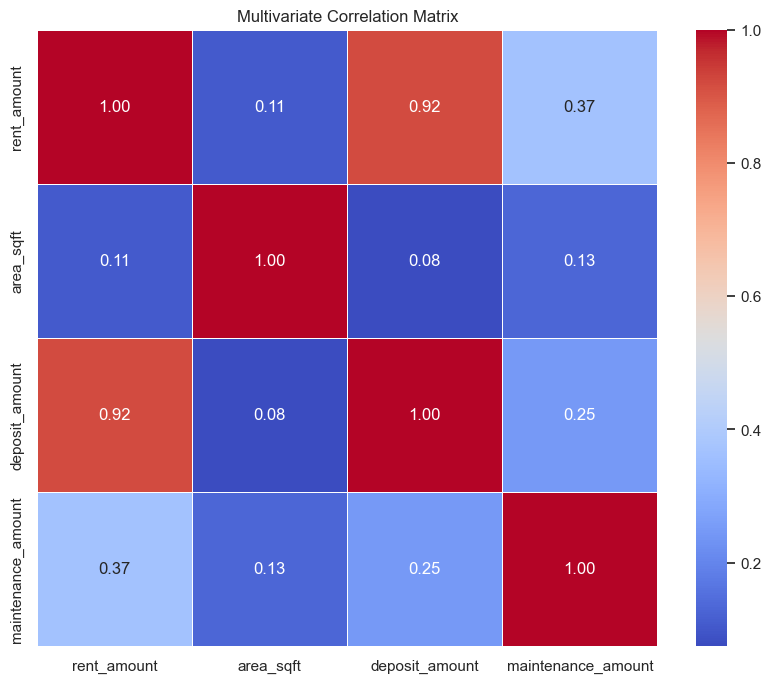

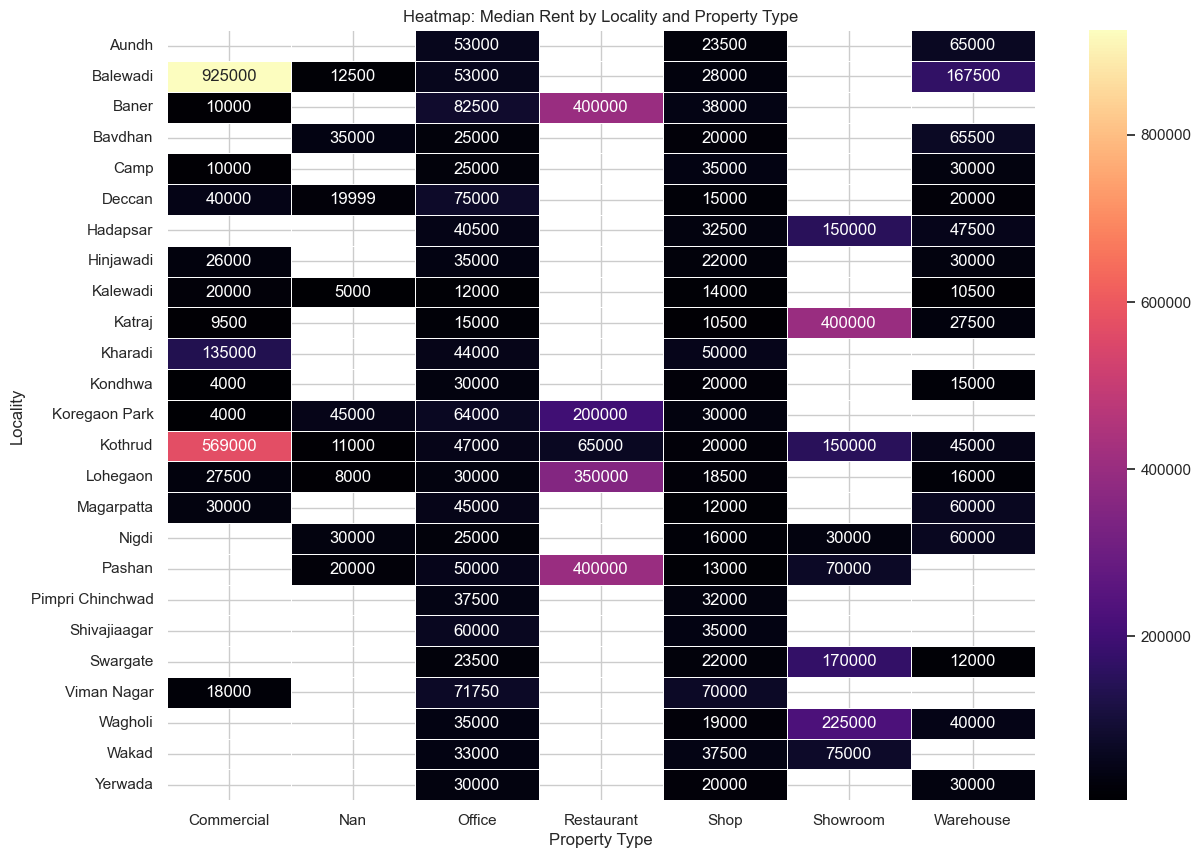

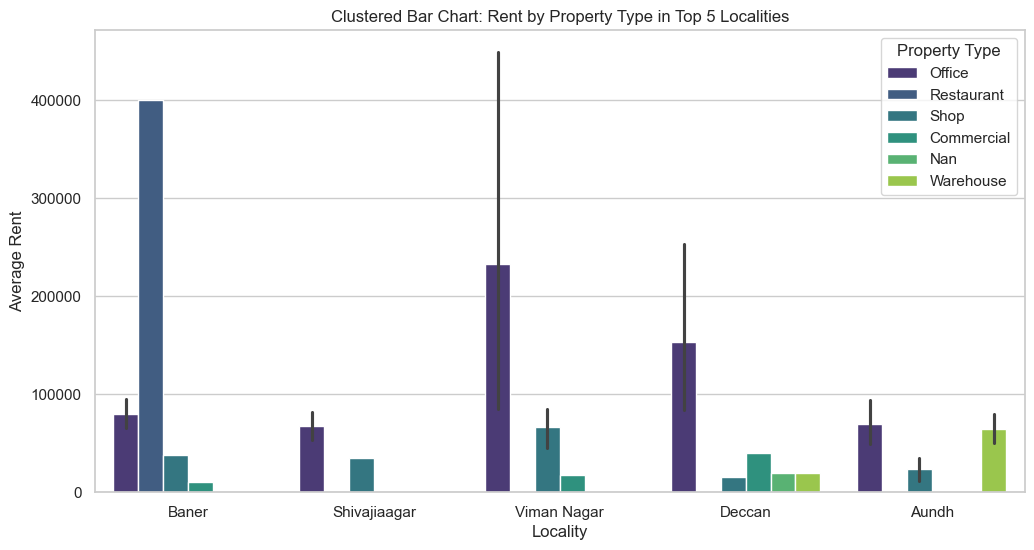

Generating Pairplot... this may take a moment.


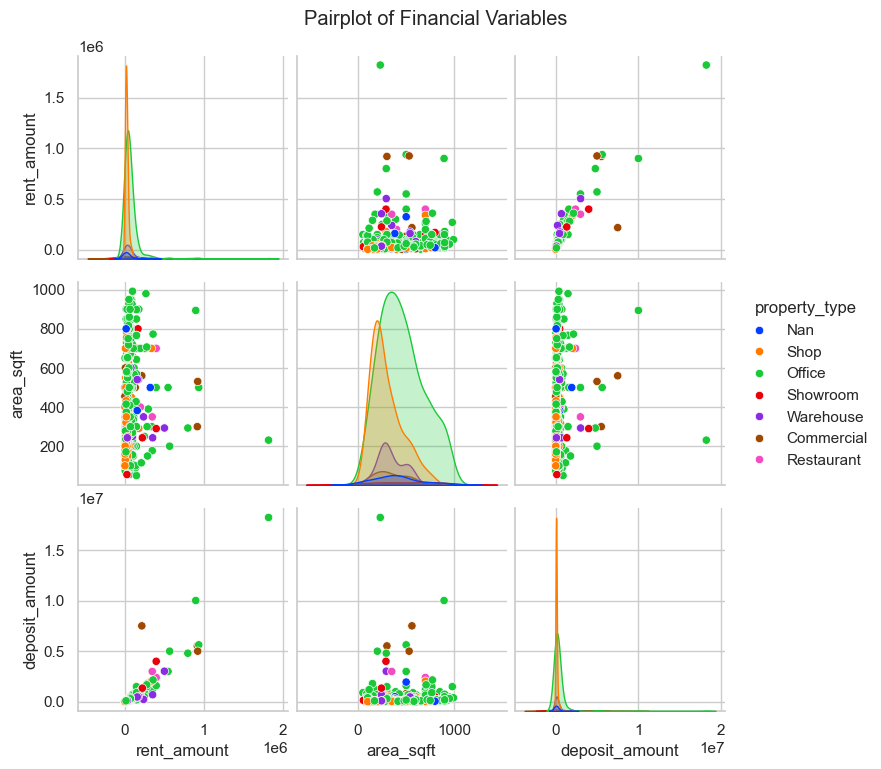

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# 1. Setup & Data Loading
# ---------------------------------------------------------
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

# Load Data
file_path = 'pune_commercial_listings_FINAL.csv'
df = pd.read_csv(file_path)

# Data Cleaning
df_clean = df[df['area_sqft'] >= 50].copy()
print(f"Data Loaded. Rows: {len(df_clean)}")

# ---------------------------------------------------------
# 2. Multivariate Visualizations (Individual Plots)
# ---------------------------------------------------------

# Plot 1: Correlation Heatmap (Numerical Variables)
# Shows relationships between Rent, Area, Deposit, and Maintenance
plt.figure(figsize=(10, 8))
corr_cols = ['rent_amount', 'area_sqft', 'deposit_amount', 'maintenance_amount']
corr_matrix = df_clean[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Multivariate Correlation Matrix')
plt.show()

# Plot 2: Pivot Table Heatmap (Locality + Property Type -> Rent)
# Shows the Median Rent for every combination of Locality and Property Type
pivot_table = pd.pivot_table(
    df_clean,
    values='rent_amount',
    index='locality',
    columns='property_type',
    aggfunc='median'
)

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="magma", linewidths=0.5)
plt.title('Heatmap: Median Rent by Locality and Property Type')
plt.xlabel('Property Type')
plt.ylabel('Locality')
plt.show()

# Plot 3: Clustered Bar Chart (Top 5 Localities)
# Compares Rent across Property Types within the top expensive localities
# We filter for the top 5 most expensive localities first
top_5_locs = df_clean.groupby('locality')['rent_amount'].median().sort_values(ascending=False).head(5).index
df_top_5 = df_clean[df_clean['locality'].isin(top_5_locs)]

plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_5, x='locality', y='rent_amount', hue='property_type', palette='viridis')
plt.title('Clustered Bar Chart: Rent by Property Type in Top 5 Localities')
plt.xlabel('Locality')
plt.ylabel('Average Rent')
plt.legend(title='Property Type')
plt.show()

# Plot 4: Pairplot (Scatter Matrix)
# Visualizes relationships between all numerical variables, colored by Property Type
# Note: Pairplot creates its own figure, so we don't use plt.figure() before it
print("Generating Pairplot... this may take a moment.")
sns.pairplot(df_clean[['rent_amount', 'area_sqft', 'deposit_amount', 'property_type']], 
             hue='property_type', palette='bright', diag_kind='kde')
plt.suptitle('Pairplot of Financial Variables', y=1.02)
plt.show()